In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import os

In [4]:
# ✅ Load Iris dataset safely
iris = load_iris(as_frame=True)
df = iris.frame.copy()

# Ensure 'target' column exists for consistent naming
if 'target' not in df.columns:
    df['target'] = iris.target

df.rename(columns={'target': 'Species'}, inplace=True)
print("✅ Dataset loaded successfully!\n")
display(df.head())
print("\nColumns:", df.columns.tolist())


✅ Dataset loaded successfully!



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Species']


In [5]:
# Separate features and target
X = df[iris.feature_names]
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, " | Test shape:", X_test.shape)


Train shape: (120, 4)  | Test shape: (30, 4)


In [6]:
model = Sequential([
    Dense(12, input_shape=(X_train.shape[1],), activation='relu', name='Hidden_1'),
    Dense(8, activation='relu', name='Hidden_2'),
    Dense(3, activation='softmax', name='Output')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                     │ (None, 12)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_2 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=8,
    verbose=1
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3500 - loss: 1.0430 - val_accuracy: 0.3333 - val_loss: 1.0040
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3417 - loss: 0.9807 - val_accuracy: 0.3333 - val_loss: 0.9485
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3333 - loss: 0.9308 - val_accuracy: 0.3667 - val_loss: 0.9093
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3417 - loss: 0.8970 - val_accuracy: 0.4000 - val_loss: 0.8823
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4000 - loss: 0.8707 - val_accuracy: 0.4333 - val_loss: 0.8625
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4750 - loss: 0.8511 - val_accuracy: 0.5667 - val_loss: 0.8457
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5583 - loss: 0.8340 - val_accuracy: 0.6667 - val_loss: 0.8290
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5917 - loss: 0.8175 - val_accuracy: 0.7000 - val_loss

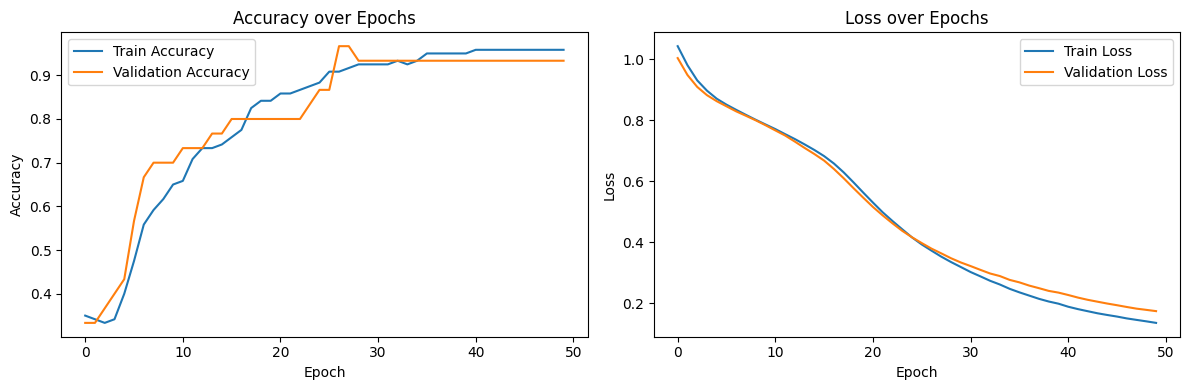

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {acc*100:.2f}%")

✅ Test Loss: 0.1739
✅ Test Accuracy: 93.33%


In [10]:
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # example Iris-setosa input
sample_scaled = scaler.transform(sample)

proba = model.predict(sample_scaled)
pred_class = np.argmax(proba, axis=1)[0]

print("Predicted class index:", pred_class)
print("Predicted label:", iris.target_names[pred_class])
print("Class probabilities:", proba)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted class index: 0
Predicted label: setosa
Class probabilities: [[9.8323935e-01 1.6704405e-02 5.6242232e-05]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install graphviz pydot

In [13]:
!dot -V

dot - graphviz version 14.0.4 (20251115.1723)


✅ Network diagram saved as: network_diagram.png


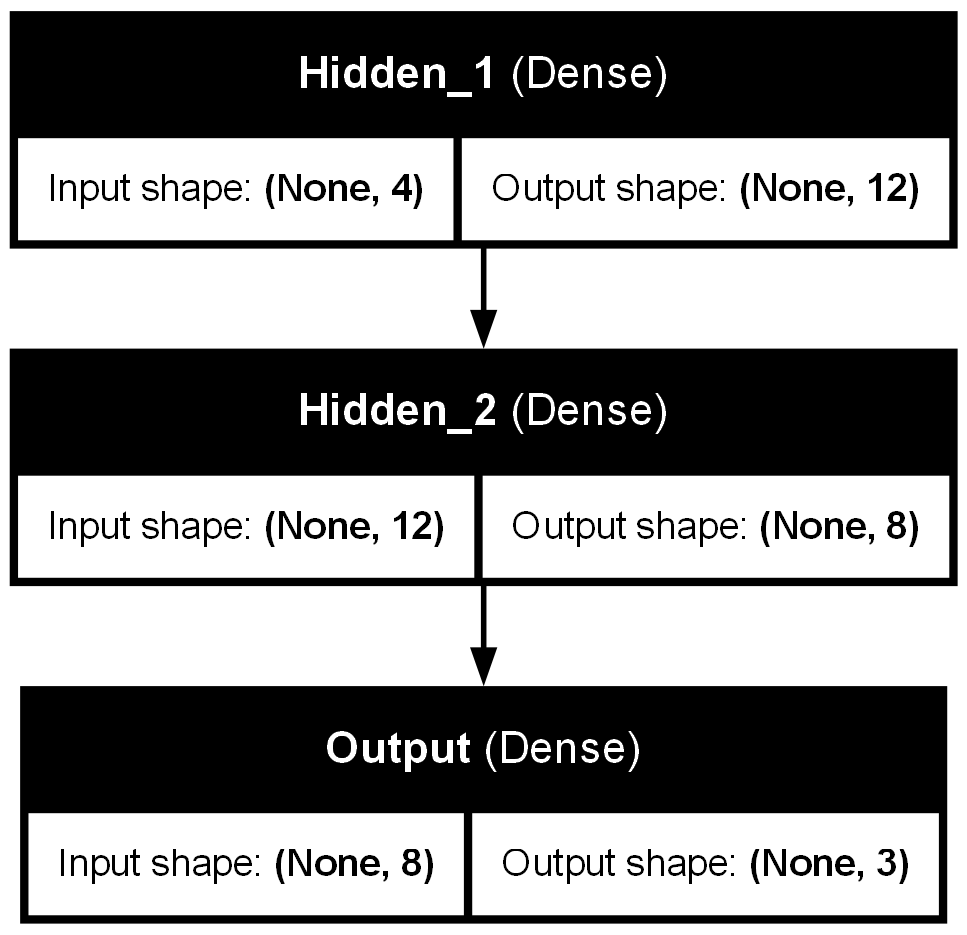

In [14]:
output_image = "network_diagram.png"

def try_ann_visualizer_save(m):
    try:
        from ann_visualizer.visualize import ann_viz
        ann_viz(m, title="Iris ANN Model Visualization")
        if os.path.exists("network.gv.png"):
            os.rename("network.gv.png", output_image)
            return True
        return False
    except Exception:
        return False

def try_plot_model_save(m):
    try:
        plot_model(m, to_file=output_image, show_shapes=True, show_layer_names=True)
        return os.path.exists(output_image)
    except Exception:
        return False

saved = try_ann_visualizer_save(model)
if not saved:
    saved = try_plot_model_save(model)

if saved:
    from IPython.display import Image, display
    print("✅ Network diagram saved as:", output_image)
    display(Image(filename=output_image))
else:
    print("⚠️ Could not save network diagram.")
    print("➡️ Make sure Graphviz and pydot are installed (pip install graphviz pydot).")


In [15]:
model_save_path = "assignment1_iris_ann.h5"
model.save(model_save_path)
print("✅ Saved trained model to:", model_save_path)

✅ Saved trained model to: assignment1_iris_ann.h5
